# Prueba Brain Food

Estamos colaborando con una empresa distribuidora de productos agrícolas que se enfrenta a un 
problema de exceso de inventario. Recientemente, han modificado su método de proyección de 
demanda y **sospechan que este cambio está relacionado con la situación actual.**

Actualmente 
utilizan el modelo cada mes para determinar cuánto inventario deben comprar al proveedor. La 
orden de compra es enviada al proveedor con un mes de anticipación.  
La empresa nos ha contactado con el objetivo de desarrollar un modelo que permita proyectar la 
demanda de manera más precisa. Para ello, nos han proporcionado los datos de ventas de los 
últimos 10 años, los cuales están a nuestra disposición. A partir del contexto entregado y de los 
datos de venta a disposición, responda las siguientes preguntas: 

**Plan de Trabajo**
1. ¿Cuál sería tu enfoque y plan de trabajo para abordar este desafío? 
2. ¿Qué tareas consideras esenciales para la ejecución de este proyecto? 
3. ¿Qué elementos específicos desarrollarías para resolver el problema planteado? Incluye una estimación del tiempo que dedicarías a cada fase y explique cómo tu solución impactaría positivamente en la situación actual de la empresa. 

**Construcción del Modelo y Validación**
1. Construya un modelo que permita proyectar la demanda y explique las validaciones que 
aplicarías para determinar su eficacia. Además, indique la ventana de tiempo que 
seleccionarías para la proyección y justifica tu elección. 
2. Generé un archivo CSV con las predicciones para el año 2024 
3. Describa cómo funcionaría este modelo en un entorno productivo, con todo lo que esto 
implica.  
Entregue un jupyter notebook con el desarrollo. 



**Medición del Beneficio en $**
1. Utilizando solo la información histórica proporcionada, ¿cómo propondrías medir el beneficio 
económico de tu solución? Detalla los métodos o métricas que emplearías para demostrar el valor 
generado para el cliente.  


**Metodología para la Puesta en Producción**
1. Diseña una metodología para asegurar que el modelo implementado en un entorno productivo 
genera beneficios para la empresa. Explica los pasos clave que seguirías para monitorear y 
mantener el rendimiento del modelo a lo largo del tiempo

## Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías
# ======================================================================================
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  HistGradientBoostingRegressor

from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import grid_search_forecaster_multiseries


# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from skforecast.model_selection import bayesian_search_forecaster





from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster


# Carga de Datos y Primera Exploracion 

In [3]:
# Lectura de Archivos

df=pd.read_csv('desafio_modelo_de_demanda.csv')

In [4]:
# Exploración tipo de datos ! 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80748 entries, 0 to 80747
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fecha            80748 non-null  object 
 1   prod_id          80748 non-null  int64  
 2   precio_promedio  80748 non-null  float64
 3   ventas           80748 non-null  float64
 4   modelo_actual    80748 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.1+ MB


In [5]:
df.describe()

,prod_id,precio_promedio,ventas,modelo_actual
count,80748.000000,80748.000000,80748.000000,80748.000000
mean,498.788379,5386.770862,1089.565958,1093.682259
std,290.397741,2893.919808,716.509618,507.905494
min,0.000000,606.335817,0.000000,0.000000
25%,248.000000,3018.438689,547.000000,713.346179
50%,494.000000,5079.052675,954.000000,1064.464617
75%,751.000000,7336.782635,1468.000000,1421.259490
max,999.000000,13978.011657,6404.000000,5397.308408


In [6]:
print(f"Shape: {df.shape}")

Shape: (80748, 5)


In [7]:
# Cambio de Formato a Fecha !! 
df['fecha']=pd.to_datetime(df['fecha'])

In [8]:
# Ordenamiento de columna fecha
df.sort_values(by='fecha',inplace=True)

In [9]:
df

,fecha,prod_id,precio_promedio,ventas,modelo_actual
56064,2012-01-01,698,8280.073778,436.0,441.953878
13632,2012-01-01,167,1961.219324,1880.0,1960.518724
27180,2012-01-01,331,4843.074738,819.0,860.015182
75084,2012-01-01,931,12346.697520,1408.0,1351.436692
42972,2012-01-01,530,6194.495105,1540.0,1522.800893
...,...,...,...,...,...
62051,2023-12-01,771,6005.951252,1890.0,1603.771810
24839,2023-12-01,302,6975.464986,2095.0,640.874562
35315,2023-12-01,434,7644.243310,897.0,1098.486855
25331,2023-12-01,308,2291.913010,1251.0,548.032291


In [152]:
print("La ventana de tiempo de fechas es desde {} hasta {}".format(df['fecha'].min(), df['fecha'].max()))


La ventana de tiempo de fechas es desde 2012-01-01 00:00:00 hasta 2023-12-01 00:00:00


Se puede ver que exixten distintos tipos de productos el cual cuenta con su precio promedio y las ventas. Ademas de el calculo del modelo actual.

C:\Users\FranciscoSepulveda\AppData\Local\Temp\ipykernel_2540\2620786197.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='fecha', y='ventas', data=df, palette='viridis')


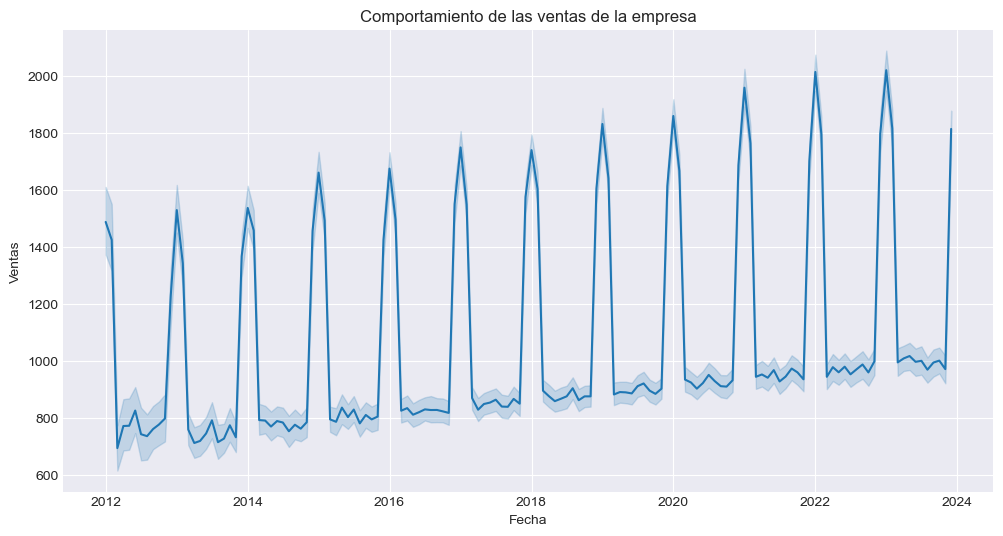

In [153]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='fecha', y='ventas', data=df, palette='viridis')
plt.title('Comportamiento de las ventas de la empresa')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

Se visualiza el comportamiento general de las ventas de la empresa independiente del tipo de producto 

Esto podria ser un enfoque de poder predecir las ventas de la empresa , pero esto parece ser un enfoque mis general , ya que me imagino que la empresa quiere ver el nivel de venta pero por producto. 

El comportamiento general de todos los datos combinados como si fueran un solo producto !

Para poder verlos mejor estos gráficos se debe separar 

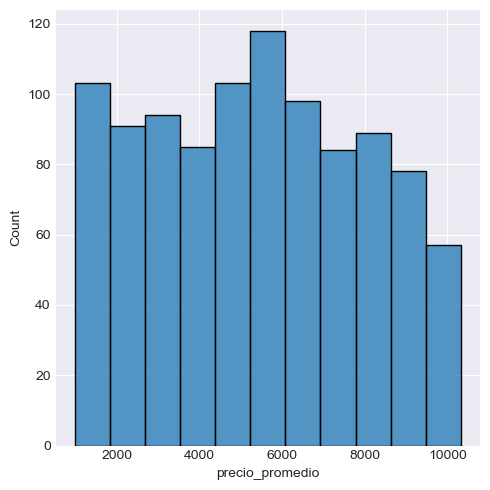

In [154]:
sns.displot(df.groupby('prod_id').precio_promedio.mean().sort_values())

## Exploracion y Nulos 

In [10]:
df_2=df.drop(columns=['precio_promedio','modelo_actual'])
# sacamos estos valores que no nos aportan mucho para realizar el primer analisis exploratorio! 

In [11]:
df_2=pd.pivot_table(
                data=df,
                values='ventas',
                index='fecha',
                columns='prod_id'

)
df_2.columns.name = None
df_2.columns = [f"item_{col}" for col in df_2.columns]



Cambiamos un poco el formato del Dataframe 

In [157]:
df_2

,item_0,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,...,item_990,item_991,item_992,item_993,item_994,item_995,item_996,item_997,item_998,item_999
fecha,,,,,,,,,,,,,,,,,,,,,
2012-01-01,NaN,NaN,1387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1524.0,631.0,NaN,NaN,NaN,NaN,NaN,955.0,NaN
2012-02-01,NaN,NaN,1700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,810.0,1978.0,NaN,NaN,NaN,NaN,NaN,1039.0,NaN
2012-03-01,NaN,NaN,1385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1019.0,85.0,NaN,NaN,NaN,NaN,NaN,599.0,NaN
2012-04-01,NaN,NaN,1263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,872.0,251.0,NaN,NaN,NaN,NaN,NaN,605.0,NaN
2012-05-01,NaN,NaN,1467.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,953.0,79.0,NaN,NaN,NaN,NaN,NaN,742.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,1338.0,412.0,NaN,1357.0,1202.0,NaN,487.0,1462.0,571.0,627.0,...,NaN,NaN,NaN,1011.0,NaN,NaN,2344.0,773.0,535.0,NaN
2023-09-01,935.0,866.0,NaN,2790.0,1202.0,NaN,274.0,1924.0,544.0,576.0,...,NaN,NaN,NaN,447.0,NaN,NaN,949.0,1152.0,645.0,NaN
2023-10-01,1347.0,784.0,NaN,1405.0,746.0,NaN,430.0,1067.0,943.0,735.0,...,NaN,NaN,NaN,594.0,NaN,NaN,1602.0,1347.0,456.0,NaN


In [12]:
df_2=df_2.asfreq('MS') # Frequencia de monthly started

C:\Users\FranciscoSepulveda\AppData\Local\Temp\ipykernel_2540\3366459060.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_2.iloc[:, :10].plot(


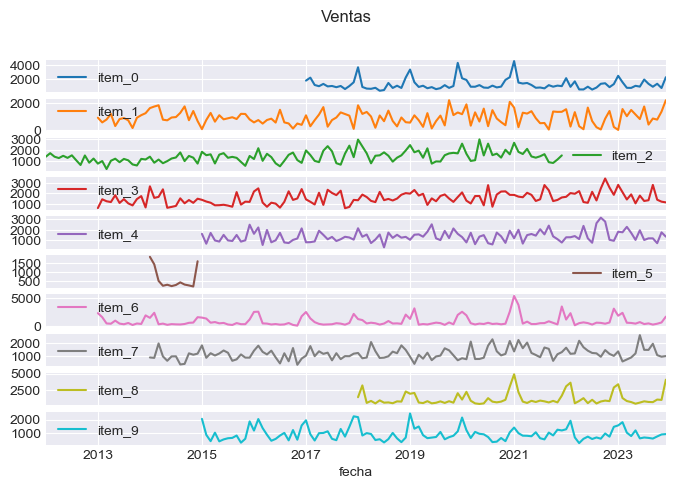

In [159]:
fig, ax = plt.subplots(figsize=(8, 5))
df_2.iloc[:, :10].plot(
    legend   = True,
    subplots = True, 
    sharex   = True,
    title    = 'Ventas',
    ax       = ax, 
); # ploteamos para poder ver como se comportan los datos de los 9 primeros items 

Tal como se puede observar existen valores perdidos y en distintas fechas para cada item !. Por lo que debemos aplicar algun metodo para valores nulos

Primero vemos la cantidad de nulos que hay !

In [160]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
nan_counts = df_2.isna().sum().sort_values()
print(nan_counts.value_counts())

84     156
60     133
72     132
48     113
36      97
12      68
24      59
132     56
0       55
108     49
96      42
120     40
dtype: int64


Existen registros que tienen 132 meses sin datos es decir que cuentan con un solo 1 año de datos ! , lo cual dificulta la predicción . 

In [161]:
print("Cantidad de nan:")
for column in df_2:
    nans=df_2[column].isna().sum()
    print(f'\tColumna {column}:{nans}') 

Cantidad de nan:
	Columna item_0:60
	Columna item_1:12
	Columna item_2:24
	Columna item_3:12
	Columna item_4:36
	Columna item_5:132
	Columna item_6:12
	Columna item_7:24
	Columna item_8:72
	Columna item_9:36
	Columna item_10:96
	Columna item_11:84
	Columna item_12:48
	Columna item_13:0
	Columna item_14:120
	Columna item_15:60
	Columna item_16:36
	Columna item_17:48
	Columna item_18:12
	Columna item_19:60
	Columna item_20:108
	Columna item_21:72
	Columna item_22:120
	Columna item_23:60
	Columna item_24:36
	Columna item_25:60
	Columna item_26:60
	Columna item_27:72
	Columna item_28:48
	Columna item_29:0
	Columna item_30:12
	Columna item_31:84
	Columna item_32:72
	Columna item_33:108
	Columna item_34:60
	Columna item_35:120
	Columna item_36:72
	Columna item_37:36
	Columna item_38:108
	Columna item_39:72
	Columna item_40:48
	Columna item_41:12
	Columna item_42:36
	Columna item_43:24
	Columna item_44:96
	Columna item_45:24
	Columna item_46:24
	Columna item_47:60
	Columna item_48:48
	Columna

In [162]:
nan_counts[nan_counts ==0].index


Index(['item_499', 'item_239', 'item_410', 'item_719', 'item_407', 'item_867',
       'item_710', 'item_256', 'item_530', 'item_549', 'item_113', 'item_698',
       'item_685', 'item_376', 'item_106', 'item_101', 'item_288', 'item_292',
       'item_889', 'item_659', 'item_297', 'item_930', 'item_359', 'item_301',
       'item_590', 'item_653', 'item_89', 'item_351', 'item_328', 'item_825',
       'item_507', 'item_750', 'item_906', 'item_475', 'item_998', 'item_786',
       'item_806', 'item_176', 'item_433', 'item_13', 'item_488', 'item_430',
       'item_813', 'item_428', 'item_776', 'item_797', 'item_796', 'item_29',
       'item_815', 'item_465', 'item_194', 'item_476', 'item_167', 'item_970',
       'item_438'],
      dtype='object')

52 items tienen 0 perdidas nulas , por lo tanto estos item deben ser los mas importantes para la empresa , los cuales han llevado ventas durante todo este tiempo y deben ser de alta omportancia generar modelos que predigan bien su demanda 

In [163]:
columnas_con_mas_nan= nan_counts[nan_counts > 130].index


De los items con mas nulos !

In [164]:
columnas_con_mas_nan

Index(['item_515', 'item_474', 'item_519', 'item_446', 'item_340', 'item_487',
       'item_346', 'item_516', 'item_575', 'item_994', 'item_490', 'item_366',
       'item_5', 'item_527', 'item_367', 'item_371', 'item_425', 'item_497',
       'item_404', 'item_551', 'item_542', 'item_427', 'item_883', 'item_650',
       'item_100', 'item_868', 'item_853', 'item_139', 'item_836', 'item_835',
       'item_147', 'item_157', 'item_70', 'item_816', 'item_803', 'item_798',
       'item_191', 'item_783', 'item_619', 'item_754', 'item_57', 'item_740',
       'item_731', 'item_725', 'item_946', 'item_54', 'item_718', 'item_257',
       'item_683', 'item_82', 'item_668', 'item_654', 'item_652', 'item_959',
       'item_232', 'item_460'],
      dtype='object')

C:\Users\FranciscoSepulveda\AppData\Local\Temp\ipykernel_2540\2412743711.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_2[columnas_con_mas_nan].plot(


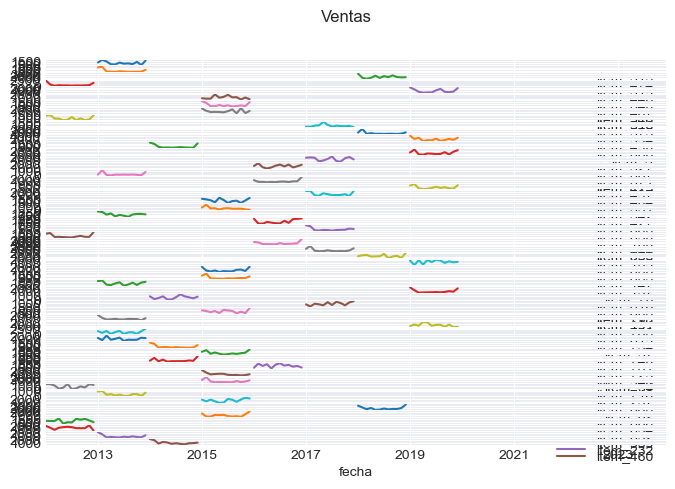

In [175]:
fig, ax = plt.subplots(figsize=(8, 5))
df_2[columnas_con_mas_nan].plot(
    legend   = True,
    subplots = True, 
    sharex   = True,
    title    = 'Ventas',
    ax       = ax, 
);

Estos items la mayoria estan alejados del 2024  , donde existen algunos que fueron registrados o comprados el 2012 ! y luego nunca mas ! 

###  Al tener más años de datos, puedes capturar mejor la estabilidad de los patrones a largo plazo. Esto es importante para identificar tendencias y estacionalidades que podrían no ser evidentes en un conjunto de datos más pequeño. Los modelos ML se benefician por conjuntos de datos grandes y tener solo 12 puntos puede significar tener un modelo poco preciso ademas de que son 56 productos lo cual siginifica 56 modelos en produccion y 56 o mas de prueba para poder encontrar un modelo preciso , ademas de que no se cuenta con data historica para poder hacer la validacion cruzada de manera optima del modelo pudiendo incurrir en overfiting o underfiting. !

Con lo anterior sumiremos lo siguiente:  Le daremos prioridad o haremos modelos para los productos que han sido comprado al menos los ultimos 4 años y los que no cuentan con nulos , dada su importancia . Si estos productos fueron comprado durante los ultimos 4 años y exixten nan realizaremos tecnicas para poder suplir esos nulos .

1. *Eliminación de columnas o filas con datos insuficientes.*
2. *Imputación de datos*
3. *Análisis por subconjuntos*




***En este caso , se asume lo siguiente !***

Se crea un algoritmo que solo deja los productos mas importantes para la empresa . Los cuales han sido comprado durante los ultimos al menos durante los ultimos 5 años , donde se tiene registro de estos. 

¿ Por que se hizo esto ?
A mi criterio hay que saber optimizar el tiempo y los recursos. Siempre. El problema da entender que : Se enfrenta a un porblema de Stock , donde se quiere poder producir la demanda . Existiendo items  que hace años que no se venden , al menos esa es mi interpretacion de los datos , que no existe venta de estos item , donde no tiene valor poder realizar prediccion , donde si existe valor en los productos que si tuvieron venta el ultimo año.  donde se buscara proyectar estas ventas al 2024 y donde presentan valor para la empresa

In [13]:

lista=[]
for column in df_2:
    fecha_1=df_2[column].first_valid_index()
    fecha_2=df_2[column].last_valid_index()
    dif_fechas=(pd.to_datetime('2023-12-01')-fecha_2)/np.timedelta64(1,'Y')
    nans=(df_2[column].isna().sum()/df_2.shape[0])*100
    if  dif_fechas < 1:
        lista.append(column)
    
    

In [14]:
print(lista ,len(lista))

['item_0', 'item_1', 'item_3', 'item_4', 'item_6', 'item_7', 'item_8', 'item_9', 'item_11', 'item_12', 'item_13', 'item_16', 'item_17', 'item_18', 'item_19', 'item_21', 'item_23', 'item_24', 'item_25', 'item_26', 'item_27', 'item_28', 'item_29', 'item_30', 'item_31', 'item_34', 'item_36', 'item_37', 'item_39', 'item_40', 'item_41', 'item_42', 'item_43', 'item_45', 'item_46', 'item_47', 'item_48', 'item_50', 'item_51', 'item_52', 'item_53', 'item_55', 'item_56', 'item_58', 'item_59', 'item_60', 'item_61', 'item_64', 'item_65', 'item_66', 'item_67', 'item_68', 'item_72', 'item_74', 'item_75', 'item_77', 'item_78', 'item_80', 'item_81', 'item_84', 'item_85', 'item_87', 'item_88', 'item_89', 'item_93', 'item_94', 'item_96', 'item_101', 'item_103', 'item_105', 'item_106', 'item_108', 'item_109', 'item_112', 'item_113', 'item_114', 'item_116', 'item_117', 'item_118', 'item_119', 'item_121', 'item_122', 'item_123', 'item_124', 'item_125', 'item_126', 'item_129', 'item_130', 'item_131', 'item_

In [15]:
df2=df_2[lista]

In [16]:
df2

,item_0,item_1,item_3,item_4,item_6,item_7,item_8,item_9,item_11,item_12,...,item_983,item_985,item_986,item_987,item_988,item_992,item_993,item_996,item_997,item_998
fecha,,,,,,,,,,,,,,,,,,,,,
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,631.0,NaN,NaN,NaN,955.0
2012-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1978.0,NaN,NaN,NaN,1039.0
2012-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,599.0
2012-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,251.0,NaN,NaN,NaN,605.0
2012-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,79.0,NaN,NaN,NaN,742.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,1338.0,412.0,1357.0,1202.0,487.0,1462.0,571.0,627.0,633.0,1363.0,...,643.0,759.0,664.0,1321.0,NaN,NaN,1011.0,2344.0,773.0,535.0
2023-09-01,935.0,866.0,2790.0,1202.0,274.0,1924.0,544.0,576.0,821.0,192.0,...,997.0,364.0,811.0,2746.0,NaN,NaN,447.0,949.0,1152.0,645.0
2023-10-01,1347.0,784.0,1405.0,746.0,430.0,1067.0,943.0,735.0,818.0,70.0,...,738.0,126.0,828.0,1384.0,NaN,NaN,594.0,1602.0,1347.0,456.0


Por lo que podemos observar del conjunto de datos inicial no existe venta de este tipo de items 

### Nulos

Experimentación:
- Puede ser beneficioso probar varias opciones y evaluar cómo afectan al rendimiento de los modelos o análisis posteriores.
- Conocimiento del Dominio:
Conocer el dominio del problema puede ayudar a tomar decisiones más informadas sobre cómo manejar los valores faltantes.

matplotlib.legend WARNING No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


matplotlib.legend WARNING No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


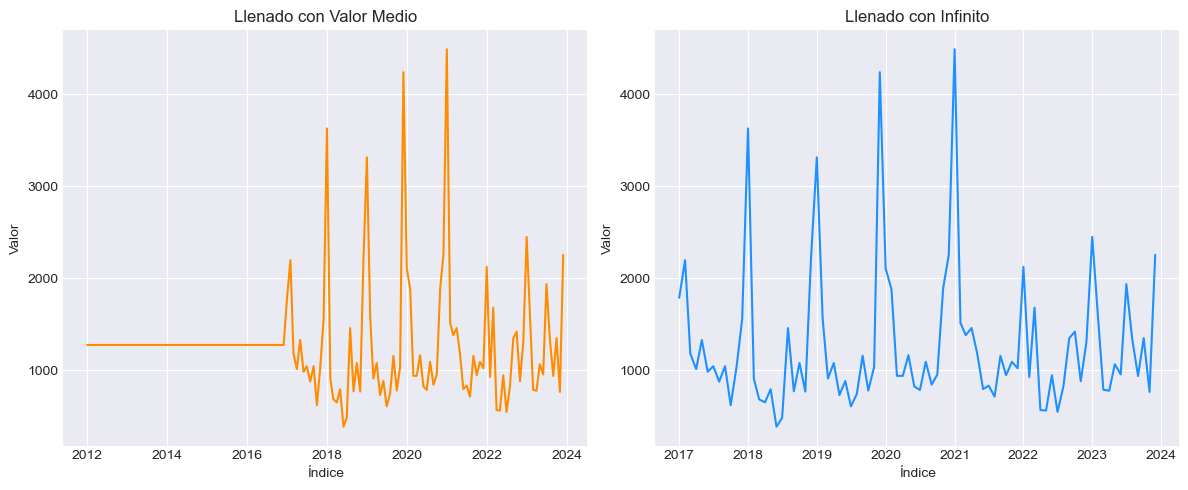

In [ ]:

plt.figure(figsize=(12, 5))

# Gráfico 1: 
plt.subplot(1, 2, 1)
sns.lineplot(df_2['item_0'].fillna(df_2['item_0'].mean()), color='darkorange')
plt.title('Llenado con Valor Medio')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()

# Gráfico 2: 
plt.subplot(1, 2, 2)
sns.lineplot(df_2['item_0'], color='dodgerblue')
plt.title('Llenado con Infinito')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Metodo 1 : KNN

In [17]:
df2=df2.fillna(method='bfill', axis=0)

In [18]:
df3=df_2[lista]

In [19]:
from sklearn.impute import KNNImputer
# Configura el imputador KNN con el número deseado de vecinos
knn_imputer = KNNImputer(n_neighbors=2)

# Aplica la imputación a tu DataFrame
df_imputado = pd.DataFrame(knn_imputer.fit_transform(df3), columns=df3.columns)



In [20]:
df_imputado.index=df_2.index

In [21]:
df_imputado

,item_0,item_1,item_3,item_4,item_6,item_7,item_8,item_9,item_11,item_12,...,item_983,item_985,item_986,item_987,item_988,item_992,item_993,item_996,item_997,item_998
fecha,,,,,,,,,,,,,,,,,,,,,
2012-01-01,2224.0,1705.0,2117.5,1235.5,1943.5,876.5,3060.5,1476.0,2257.0,1391.5,...,2669.0,2229.5,869.5,1599.0,1936.5,631.0,1209.5,2313.0,1416.0,955.0
2012-02-01,2940.5,1455.5,1670.0,2206.0,1709.5,876.5,2140.0,1451.5,1796.5,892.5,...,2545.0,2142.0,1026.0,1770.5,1444.0,1978.0,829.0,2684.0,1023.5,1039.0
2012-03-01,905.5,442.0,762.0,1358.5,218.5,840.5,316.5,700.0,861.0,635.5,...,462.0,390.5,659.0,1078.0,979.0,85.0,535.0,2024.5,1103.5,599.0
2012-04-01,1037.0,1266.0,1718.5,1035.0,439.5,703.5,640.0,961.5,1030.5,842.0,...,1174.0,828.5,433.0,1570.5,594.5,251.0,651.5,2598.0,673.0,605.0
2012-05-01,1012.0,865.0,1473.0,1323.0,811.0,1258.5,624.0,905.0,1042.5,755.0,...,990.0,430.0,521.5,1274.5,917.0,79.0,516.0,1906.5,1012.0,742.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,1338.0,412.0,1357.0,1202.0,487.0,1462.0,571.0,627.0,633.0,1363.0,...,643.0,759.0,664.0,1321.0,1046.5,225.0,1011.0,2344.0,773.0,535.0
2023-09-01,935.0,866.0,2790.0,1202.0,274.0,1924.0,544.0,576.0,821.0,192.0,...,997.0,364.0,811.0,2746.0,1229.5,267.5,447.0,949.0,1152.0,645.0
2023-10-01,1347.0,784.0,1405.0,746.0,430.0,1067.0,943.0,735.0,818.0,70.0,...,738.0,126.0,828.0,1384.0,865.5,201.0,594.0,1602.0,1347.0,456.0


matplotlib.legend WARNING No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


matplotlib.legend WARNING No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


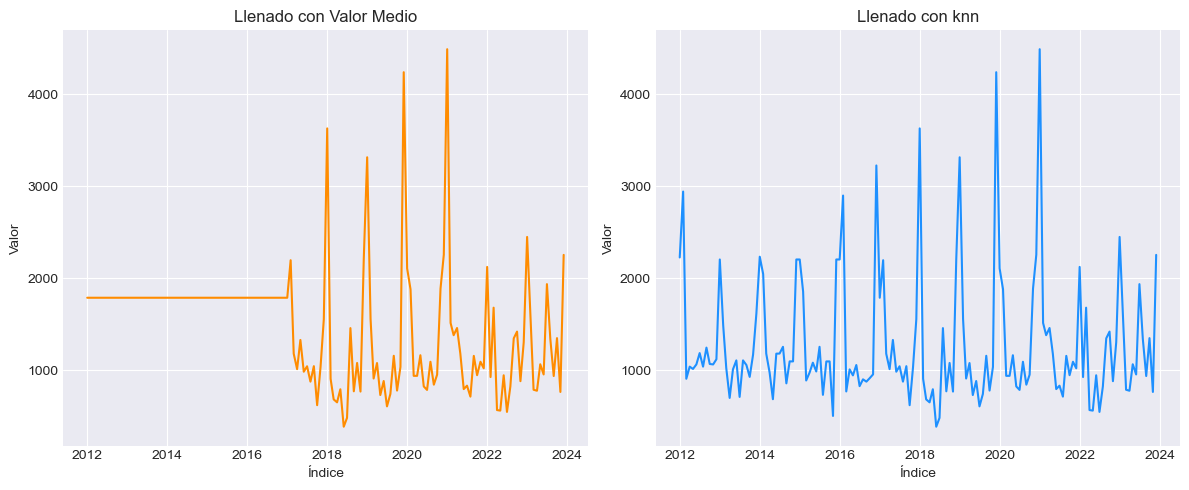

In [ ]:

plt.figure(figsize=(12, 5))

# Gráfico 1: 
plt.subplot(1, 2, 1)
sns.lineplot(df2['item_0'], color='darkorange')
plt.title('Llenado con Valor Medio')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()

# Gráfico 2: 
plt.subplot(1, 2, 2)
sns.lineplot(df_imputado['item_0'], color='dodgerblue')
plt.title('Llenado con knn')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()



El llenado de los nulos con KNN al parecer se ve mejor ya que contiene la componente estacionar y mantiene la forma de la serie de tiempo 



De igual forma se dee corroborar con el modelo !

# Modelado 

## Forecasting individual para un item : Siempre es bueno mantenerlo Simple ! ... al principio 


Debemos primero selecionar nuestro item 

In [ ]:
df_13=df_imputado['item_13']

Particionar el testeo el entrenamiento y la validacion !

Test set debido a que no tenemos datos para validar nuestro modelo con data no vista , por lo tanto para poder entrega run modelo mas real debemos realizar esta partición !

In [ ]:
df_13=df_imputado['item_13']

In [177]:
df_13=pd.DataFrame(df_13)

In [ ]:
df_13.loc['2023-12-01']

item_13    2367.0
Name: 2023-12-01 00:00:00, dtype: float64

In [214]:
 # Separación datos train-val-test
# ==============================================================================
datos = df_13.loc['2012-01-01':'2023-12-01'].copy()
fin_train = '2021-12-01'
fin_validacion = '2022-12-01'
datos_train = datos.loc[:fin_train].copy()
datos_val   = datos.loc[fin_train:fin_validacion, :].copy()
datos_test  = datos.loc[fin_validacion:, :].copy()

print(f"Fechas train      : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas validacion : {datos_val.index.min()} --- {datos_val.index.max()}  (n={len(datos_val)})")
print(f"Fechas test       : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

Fechas train      : 2012-01-01 00:00:00 --- 2021-12-01 00:00:00  (n=120)
Fechas validacion : 2021-12-01 00:00:00 --- 2022-12-01 00:00:00  (n=13)
Fechas test       : 2022-12-01 00:00:00 --- 2023-12-01 00:00:00  (n=13)


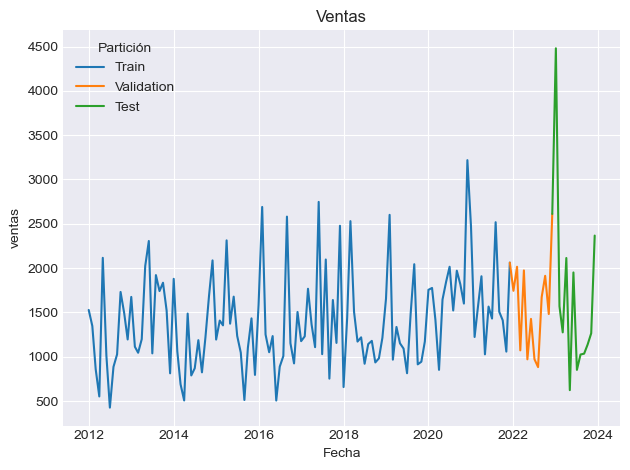

In [215]:
# Gráfico de líneas para datos de entrenamiento
sns.lineplot(x=datos_train.index, y='item_13', data=datos_train, label='Train')

# Gráfico de líneas para datos de validación
sns.lineplot(x=datos_val.index, y='item_13', data=datos_val, label='Validation')

# Gráfico de líneas para datos de prueba
sns.lineplot(x=datos_test.index, y='item_13', data=datos_test, label='Test')

# Configuración del gráfico
plt.title('Ventas')
plt.xlabel('Fecha')
plt.ylabel('ventas')
plt.legend(title='Partición')
plt.tight_layout()

# Muestra el gráfico
plt.show()

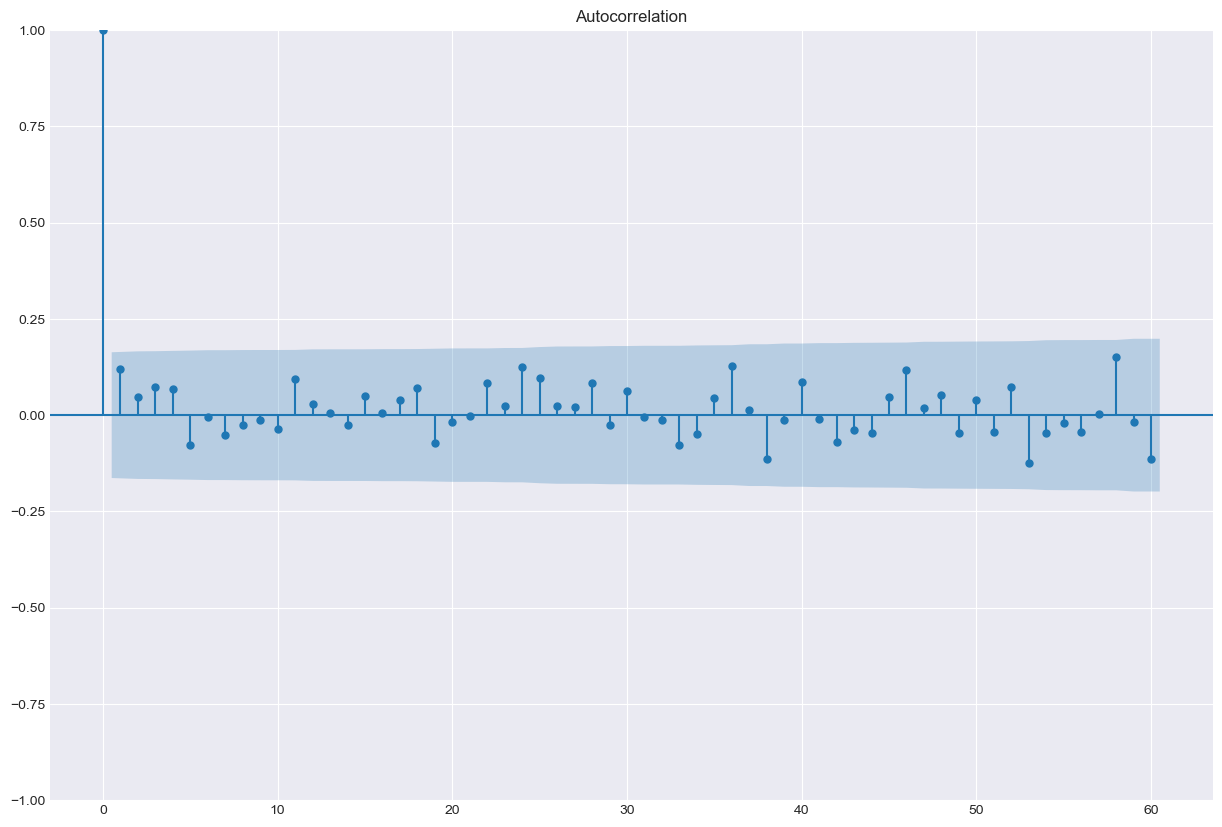

In [ ]:
# Gráfico autocorrelación
from statsmodels.graphics.tsaplots import plot_pacf

# ==============================================================================
fig, ax = plt.subplots(figsize=(15, 10))
plot_acf(datos.item_13, ax=ax, lags=60)
plt.show()

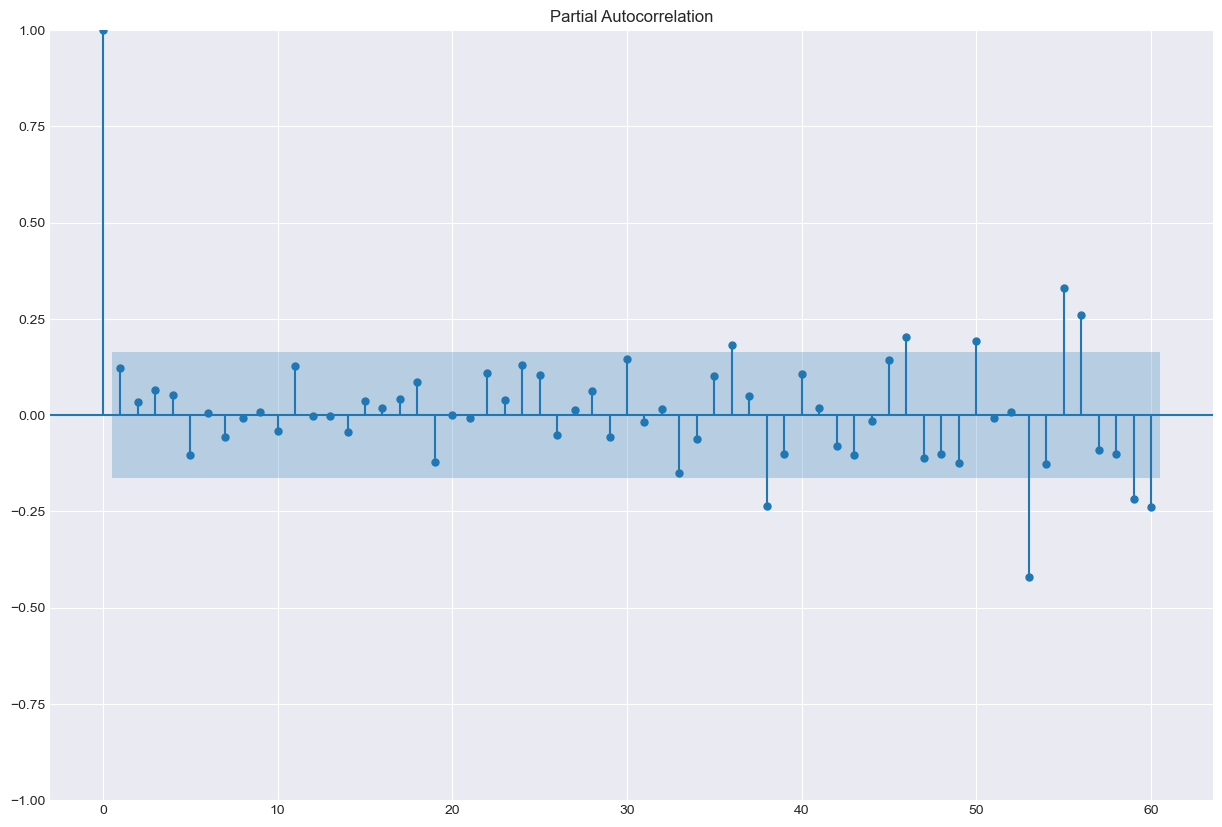

In [ ]:
# Gráfico autocorrelación parcial
# ==============================================================================
fig, ax = plt.subplots(figsize=(15, 10))
plot_pacf(datos.item_13 , ax=ax, lags=60)
plt.show()

Los gráficos de autocorrelación y autocorrelación parcial muestran una clara asociación entre la demanda de una hora y las horas anteriores, así como entre la demanda de una hora y la demanda de esa misma hora los días anteriores. Este tipo de correlación, es un indicativo de que los modelos autorregresivos pueden funcionar bie

Se podria tener un modelo estadistico como ARIMA pero es dificil poder encontrar los patrones estadisticos de 1000 items rapidamente , al menos este enfoque para este ejercicio no lo aplicaria directamente. Para algunos productos importantes lo haria cosa de tener un modelado estadistico de las tendencias medias y estacionalidadesm, que ya mencionamos que son importantes en los productos agricolas. Pero de manera general quizas es mejor un modelo que aprenda de los datos, ya que no tenemos mayor contexto, ya que podriamos tener estacionalidades o variables exogenas que expliquen algunos comportamientos haciendo mas facil el modelado

## Baseline

In [180]:
from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from lightgbm import LGBMRegressor



In [216]:
#Crear un baseline: valor del mismo mes del año anterior
# ==============================================================================
forecaster = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(months=12),
                 n_offsets = 1
             )

# Entremaiento del forecaster
# ==============================================================================
forecaster.fit(y=datos.loc[:fin_validacion, 'item_13'])
forecaster

ForecasterEquivalentDate 
Offset: <DateOffset: months=12> 
Number of offsets: 1 
Aggregation function: mean 
Window size: 12 
Training range: [Timestamp('2012-01-01 00:00:00'), Timestamp('2022-12-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Creation date: 2024-02-04 16:37:41 
Last fit date: 2024-02-04 16:37:41 
Skforecast version: 0.11.0 
Python version: 3.11.3 
Forecaster id: None 

In [217]:
# Predicciones
# ==============================================================================
steps = 12
predicciones = forecaster.predict(steps=steps)
predicciones

2023-01-01    1744.0
2023-02-01    2015.0
2023-03-01    1072.0
2023-04-01    1974.0
2023-05-01     971.0
2023-06-01    1427.0
2023-07-01     972.0
2023-08-01     883.0
2023-09-01    1673.0
2023-10-01    1913.0
2023-11-01    1482.0
2023-12-01    2611.0
Freq: MS, Name: pred, dtype: float64

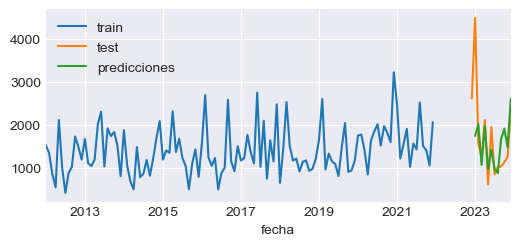

In [218]:
# Gráfico de predicciones vs valores reales
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 2.5))
datos_train['item_13'].plot(ax=ax, label='train')
datos_test['item_13'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

In [219]:
predicciones

2023-01-01    1744.0
2023-02-01    2015.0
2023-03-01    1072.0
2023-04-01    1974.0
2023-05-01     971.0
2023-06-01    1427.0
2023-07-01     972.0
2023-08-01     883.0
2023-09-01    1673.0
2023-10-01    1913.0
2023-11-01    1482.0
2023-12-01    2611.0
Freq: MS, Name: pred, dtype: float64

In [226]:
datos_test

,item_13
fecha,
2022-12-01,2611.0
2023-01-01,4480.0
2023-02-01,1570.0
2023-03-01,1275.0
2023-04-01,2114.0
2023-05-01,623.0
2023-06-01,1951.0
2023-07-01,852.0
2023-08-01,1025.0


In [225]:
# Error test
# ==============================================================================
error_mse = mean_squared_error(
                y_true = datos_test[datos_test.index >'2022-12-01'],
                y_pred = predicciones
            )

print(f"Error de test (mse): {error_mse}")

Error de test (mse): 774218.25


**Backtesting**
- Para obtener una estimación robusta de la capacidad predictiva del modelo, se lleva a cabo un proceso de backtesting. El backtesting consiste en evaluar el comportamiento de un modelo predictivo al aplicarlo de forma retrospectiva sobre datos históricos. Por lo tanto, es una estrategia de validación que permite cuantificar la capacidad predictiva de un modelo.

https://https//skforecast.org/0.9.0/user_guides/backtesting#which-strategy-should-i-use

In [229]:
len(datos)

144

In [230]:
# Backtesting
# ==============================================================================
steps=12
n_back_testing=12*2
metric, predictions = backtesting_forecaster(
                          forecaster         = forecaster,
                          y                  = datos['item_13'],
                          steps              = 12,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(datos)-n_back_testing,
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = True
                      )

print(f"Backtest error (MAE): {metric}")

  0%|          | 0/2 [00:00<?, ?it/s]

Backtest error (MAE): 522.0416666666666


In [231]:
predictions

,pred
2022-01-01,2471.0
2022-02-01,1223.0
2022-03-01,1553.0
2022-04-01,1908.0
2022-05-01,1027.0
2022-06-01,1566.0
2022-07-01,1431.0
2022-08-01,2518.0
2022-09-01,1507.0
2022-10-01,1411.0


In [232]:
# Error test
# ==============================================================================
error_mse = mean_squared_error(
                y_true = datos_test[datos_test.index >'2022-12-01'],
                y_pred = predicciones
            )

print(f"Error de test (mse): {error_mse}")

Error de test (mse): 774218.25


## Modelo autoregresivo recursivo


In [233]:
# Crear el forecaster
# Ocupamos LightGBM Como regresor 
from lightgbm import LGBMRegressor
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor = LGBMRegressor(random_state=15926, verbose=-1),
                 lags      = 24
             )
             
# Entrena el forecaster
# ==============================================================================
forecaster.fit(y=datos.loc[:fin_validacion, 'item_13'])
forecaster

ForecasterAutoreg 
Regressor: LGBMRegressor(random_state=15926, verbose=-1) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Transformer for y: None 
Transformer for exog: None 
Window size: 24 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2012-01-01 00:00:00'), Timestamp('2022-12-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 15926, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose': -1} 
fit_kwarg

In [238]:
# Backtesting
# ==============================================================================
metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = datos['item_13'],
                            steps              =12,
                            metric             = 'mean_absolute_error',
                            initial_train_size = len(datos)-12*4,
                            refit              = True,
                            n_jobs             = 'auto',
                            verbose            = True,
                            show_progress      = True
                        )

Information of backtesting process
----------------------------------
Number of observations used for initial training: 96
Number of observations used for backtesting: 48
    Number of folds: 4
    Number of steps per fold: 12
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2012-01-01 00:00:00 -- 2019-12-01 00:00:00  (n=96)
    Validation: 2020-01-01 00:00:00 -- 2020-12-01 00:00:00  (n=12)
Fold: 1
    Training:   2013-01-01 00:00:00 -- 2020-12-01 00:00:00  (n=96)
    Validation: 2021-01-01 00:00:00 -- 2021-12-01 00:00:00  (n=12)
Fold: 2
    Training:   2014-01-01 00:00:00 -- 2021-12-01 00:00:00  (n=96)
    Validation: 2022-01-01 00:00:00 -- 2022-12-01 00:00:00  (n=12)
Fold: 3
    Training:   2015-01-01 00:00:00 -- 2022-12-01 00:00:00  (n=96)
    Validation: 2023-01-01 00:00:00 -- 2023-12-01 00:00:00  (n=12)



  0%|          | 0/4 [00:00<?, ?it/s]

In [239]:
# Error backtest
# ==============================================================================
print(f'Error de backtest (MAE): {metrica}')

Error de backtest (MAE): 613.540801573256


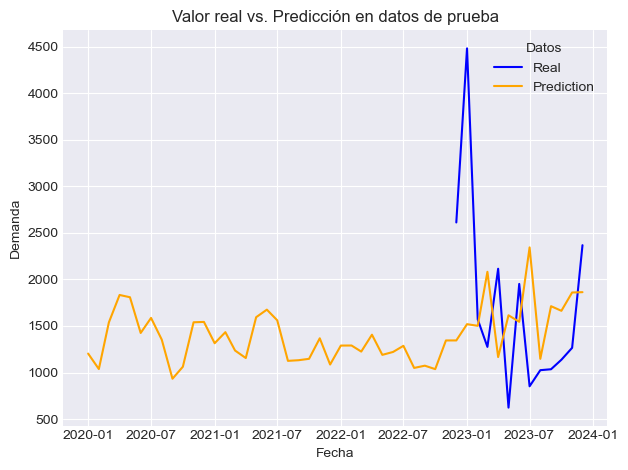

In [240]:
# Gráfico de líneas para valores reales
sns.lineplot(x=datos_test.index, y='item_13', data=datos_test, label='Real', color='blue')

# Gráfico de líneas para predicciones
sns.lineplot(x=predicciones.index, y='pred', data=predicciones, label='Prediction', color='orange')

# Configuración del gráfico
plt.title('Valor real vs. Predicción en datos de prueba')
plt.xlabel('Fecha')
plt.ylabel('Demanda')
plt.legend(title='Datos')
plt.tight_layout()

# Muestra el gráfico
plt.show()

Nos fue mucho mejor con el reentrenamiento !

#### Tunning !

In [242]:
# Búsqueda bayesiana de hiperparámetros
from skforecast.model_selection import bayesian_search_forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor = LGBMRegressor(random_state=15926, verbose=-1),
                 lags      = 24, # Este valor se modifica durante la búsqueda
             )

# Lags utilizados como predictores
lags_grid = [24, [1, 2, 3, 23, 24]]

# Espacio de búsqueda de hiperparámetros
def search_space(trial):
    search_space  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 600, 1200, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
    } 
    return search_space

resultados_busqueda, frozen_trial = bayesian_search_forecaster(
                                        forecaster         = forecaster,
                                        y                  = datos.loc[:fin_validacion, 'item_13'],
                                        steps              = 12,
                                        metric             = 'mean_absolute_error',
                                        search_space       = search_space,
                                        lags_grid          = lags_grid,
                                        initial_train_size = len(datos)-12*4,
                                        refit              = True,
                                        n_trials           = 20, # Aumentar para una búsqueda más exhaustiva
                                        random_state       = 123,
                                        return_best        = True,
                                        n_jobs             = 'auto',
                                        verbose            = False,
                                        show_progress      = True) # Busqueda de hiperparametros del regresor ocupado 

Number of models compared: 40,
         20 bayesian search in each lag configuration.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3 23 24] 
  Parameters: {'n_estimators': 600, 'max_depth': 7, 'learning_rate': 0.03615287071009865, 'reg_alpha': 0.1, 'reg_lambda': 0.1}
  Backtesting metric: 475.56349086296245



In [243]:
# Resultados de la búsqueda
# ==============================================================================
resultados_busqueda.head(10)

,lags,params,mean_absolute_error,n_estimators,max_depth,learning_rate,reg_alpha,reg_lambda
32,"[1, 2, 3, 23, 24]","{'n_estimators': 600, 'max_depth': 7, 'learnin...",475.563491,600.0,7.0,0.036153,0.1,0.1
36,"[1, 2, 3, 23, 24]","{'n_estimators': 1200, 'max_depth': 7, 'learni...",487.823788,1200.0,7.0,0.066863,0.2,0.2
34,"[1, 2, 3, 23, 24]","{'n_estimators': 700, 'max_depth': 8, 'learnin...",495.945571,700.0,8.0,0.022655,0.0,0.0
33,"[1, 2, 3, 23, 24]","{'n_estimators': 600, 'max_depth': 8, 'learnin...",498.979427,600.0,8.0,0.018067,0.0,0.1
38,"[1, 2, 3, 23, 24]","{'n_estimators': 1100, 'max_depth': 5, 'learni...",512.812026,1100.0,5.0,0.074268,0.2,0.2
31,"[1, 2, 3, 23, 24]","{'n_estimators': 600, 'max_depth': 7, 'learnin...",521.631788,600.0,7.0,0.280064,0.2,0.2
35,"[1, 2, 3, 23, 24]","{'n_estimators': 700, 'max_depth': 10, 'learni...",523.472345,700.0,10.0,0.013411,0.1,0.0
29,"[1, 2, 3, 23, 24]","{'n_estimators': 700, 'max_depth': 6, 'learnin...",523.703514,700.0,6.0,0.492924,0.5,0.6
37,"[1, 2, 3, 23, 24]","{'n_estimators': 1200, 'max_depth': 7, 'learni...",535.939163,1200.0,7.0,0.079837,0.2,0.2
26,"[1, 2, 3, 23, 24]","{'n_estimators': 600, 'max_depth': 6, 'learnin...",544.555963,600.0,6.0,0.221123,0.5,0.4


In [245]:
# Mejor modelo
# ==============================================================================
forecaster

ForecasterAutoreg 
Regressor: LGBMRegressor(learning_rate=0.03615287071009865, max_depth=7, n_estimators=600,
              random_state=15926, reg_alpha=0.1, reg_lambda=0.1, verbose=-1) 
Lags: [ 1  2  3 23 24] 
Transformer for y: None 
Transformer for exog: None 
Window size: 24 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2012-01-01 00:00:00'), Timestamp('2022-12-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.03615287071009865, 'max_depth': 7, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 600, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 15926, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 1.0, 'subsa

In [249]:
# Backtest modelo final
# ==============================================================================
metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = datos['item_13'],
                            steps              = 12,
                            metric             = 'mean_absolute_error',
                            initial_train_size = len(datos)-12*4,
                            refit              = True,
                            n_jobs             = 'auto',
                            verbose            = True,
                            show_progress      = True
                        )



Information of backtesting process
----------------------------------
Number of observations used for initial training: 96
Number of observations used for backtesting: 48
    Number of folds: 4
    Number of steps per fold: 12
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2012-01-01 00:00:00 -- 2019-12-01 00:00:00  (n=96)
    Validation: 2020-01-01 00:00:00 -- 2020-12-01 00:00:00  (n=12)
Fold: 1
    Training:   2013-01-01 00:00:00 -- 2020-12-01 00:00:00  (n=96)
    Validation: 2021-01-01 00:00:00 -- 2021-12-01 00:00:00  (n=12)
Fold: 2
    Training:   2014-01-01 00:00:00 -- 2021-12-01 00:00:00  (n=96)
    Validation: 2022-01-01 00:00:00 -- 2022-12-01 00:00:00  (n=12)
Fold: 3
    Training:   2015-01-01 00:00:00 -- 2022-12-01 00:00:00  (n=96)
    Validation: 2023-01-01 00:00:00 -- 2023-12-01 00:00:00  (n=12)



  0%|          | 0/4 [00:00<?, ?it/s]

In [252]:
print(f"Error de backtest (MAE): {metrica}")
predicciones.head()

Error de backtest (MAE): 571.3094968114142


,pred
2020-01-01,1278.424544
2020-02-01,1059.226109
2020-03-01,1180.200390
2020-04-01,1203.835707
2020-05-01,1631.948805


Nos fue mejor con este modelo pero al momento de testear con el 2023 nos va mal quizas hay un componente que no estamos viendo alguna variable que hizo cambiar las tendencias 

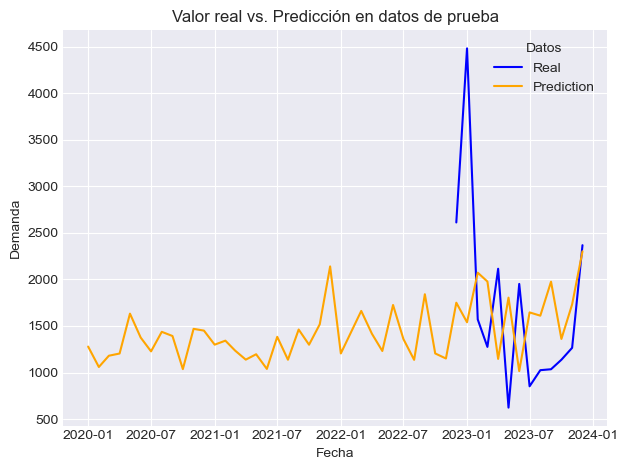

In [251]:
# Gráfico de líneas para valores reales
sns.lineplot(x=datos_test.index, y='item_13', data=datos_test, label='Real', color='blue')

# Gráfico de líneas para predicciones
sns.lineplot(x=predicciones.index, y='pred', data=predicciones, label='Prediction', color='orange')

# Configuración del gráfico
plt.title('Valor real vs. Predicción en datos de prueba')
plt.xlabel('Fecha')
plt.ylabel('Demanda')
plt.legend(title='Datos')
plt.tight_layout()

# Muestra el gráfico
plt.show()

Para este modelo en particular tenemos un error del Error de backtest (MAE): 571.3094968114142


Dejamos para otra ocacion probar otros modelos como ARIMA , ARIMAX, Ademas de las redes neuronales que por temas de tiempo no pudimos probar 

# Modelo Multiserie


Este desafio lo podemos tomar como buscar un ,modelo con toda la informacion disponible es decir meter todo dentro para ver que modelo puede aprovechar mejor los datos 

**Ventajas de los modelos multiseries:**

- Es más fácil mantener y controlar un solo modelo que varios.

- Dado que todas las series temporales se combinan durante el entrenamiento, cuando las series sean cortas (pocos datos) el modelo tendrá una mayor capacidad de aprendizaje al disponer de más observaciones.

- Al combinar múltiples series temporales, el modelo puede aprender patrones más generalizables.



**Desventajas de los modelos multiseries:**

- Si las series no siguen la misma dinámica interna, el modelo puede aprender un patrón que no represente a ninguna de ellas.

- Las series pueden enmascararse unas a otras, por lo que el modelo puede no predecirlas todas con el mismo rendimiento.

- Es más exigente desde el punto de vista computacional (tiempo y recursos) entrenar y realizar backtesting de un modelo grande que de varios pequeños

Veamos como se comportana algunos items 

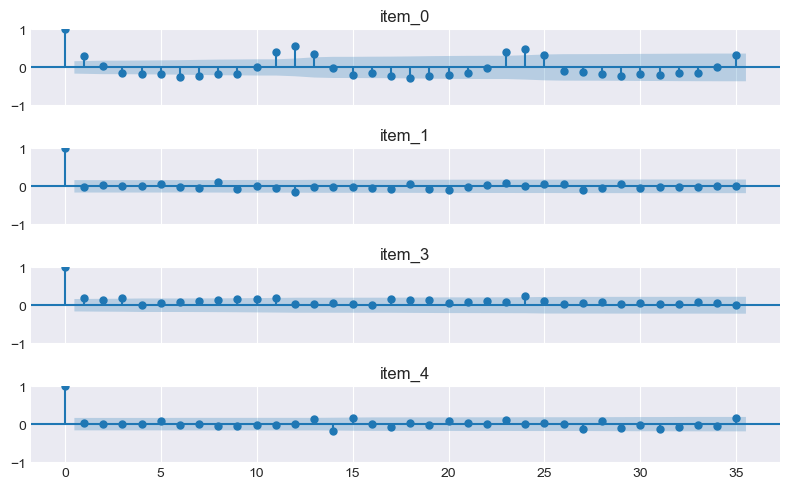

In [ ]:
# Gráficos de autocorrelación
# ======================================================================================
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 5), sharex=True)
axes = axes.flat
for i, col in enumerate(df_imputado.columns[:4]):
    plot_acf(df_imputado[col], ax=axes[i], lags=7*5)
    axes[i].set_title(f'{col}')
fig.tight_layout()
plt.show()

In [254]:
# Separación datos train-val-test
# ==============================================================================
datos = df_imputado.loc['2012-01-01':'2023-12-01'].copy()
fin_train = '2021-12-01'
fin_validacion = '2022-12-01'
datos_train = datos.loc['2018-01-01':fin_train].copy() ##  Ojo Aca se redujo el espacio de entrenamiento ayudando en los resultados finales !
datos_val   = datos.loc[fin_train:fin_validacion, :].copy()
datos_test  = datos.loc[fin_validacion:, :].copy()

print(f"Fechas train      : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas validacion : {datos_val.index.min()} --- {datos_val.index.max()}  (n={len(datos_val)})")
print(f"Fechas test       : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

Fechas train      : 2018-01-01 00:00:00 --- 2021-12-01 00:00:00  (n=48)
Fechas validacion : 2021-12-01 00:00:00 --- 2022-12-01 00:00:00  (n=13)
Fechas test       : 2022-12-01 00:00:00 --- 2023-12-01 00:00:00  (n=13)


In [ ]:
# Entrenar y realizar backtesting de un modelo para cada item
# ======================================================================================
items = []
mae_values = []
predictions = {}

for i, item in enumerate(tqdm(df_imputado.columns)):

    # Definir el forecaster
    forecaster = ForecasterAutoreg(
                     regressor     =HistGradientBoostingRegressor(random_state=123),
                     lags          = 14,
                     transformer_y = StandardScaler()
                 )
    steps=1
    # Backtesting forecaster
    metric, preds = backtesting_forecaster(
                        forecaster         = forecaster,
                        y                  = df_imputado[item],
                        initial_train_size = len(datos_train) + len(datos_val),
                        steps              = steps,
                        metric             = 'mean_absolute_error',
                        refit              = False,
                        fixed_train_size   = False,
                        verbose            = False,
                        show_progress      = False
                    )

    items.append(item)
    mae_values.append(metric)
    predictions[item] = preds

# Resultados
uni_series_mae = pd.Series(
                     data  = mae_values,
                     index = items,
                     name  = 'uni_series_mae'
                 )

100%|██████████| 676/676 [04:12<00:00,  2.68it/s]


## Multiseries

In [ ]:
# Entrenar y realizar backtesting con un único modelo para todos los items
# ======================================================================================
items = list(datos.columns)

# Definir el forecaster
forecaster_ms = ForecasterAutoregMultiSeries(
                    regressor          = HistGradientBoostingRegressor(random_state=123),
                    lags               = 12,
                    transformer_series = StandardScaler(),
                )

# Backtesting forecaster para todos los items
multi_series_mae, predictions_ms = backtesting_forecaster_multiseries(
                                       forecaster         = forecaster_ms,
                                       series             = datos,
                                       levels             = items,
                                       steps              = 12,
                                       metric             = 'mean_absolute_error',
                                       initial_train_size = len(datos_train) + len(datos_val),
                                       refit              = False,
                                       fixed_train_size   = False,
                                       verbose            = False,
                                       show_progress      = True  
                                   )

# Resultados
display(multi_series_mae.head(3))
print('')
display(predictions_ms.head(3))

  0%|          | 0/7 [00:00<?, ?it/s]

,levels,mean_absolute_error
0,item_0,368.690004
1,item_1,494.401710
2,item_3,561.210587


,item_0,item_1,item_3,item_4,item_6,item_7,item_8,item_9,item_11,item_12,item_13,item_16,item_17,item_18,item_19,item_21,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31,item_34,item_36,item_37,item_39,item_40,item_41,item_42,item_43,item_45,item_46,item_47,item_48,item_50,item_51,item_52,item_53,item_55,item_56,item_58,item_59,item_60,item_61,item_64,item_65,item_66,item_67,item_68,item_72,item_74,item_75,item_77,item_78,item_80,item_81,item_84,item_85,item_87,item_88,item_89,item_93,item_94,item_96,item_101,item_103,item_105,item_106,item_108,item_109,item_112,item_113,item_114,item_116,item_117,item_118,item_119,item_121,item_122,item_123,item_124,item_125,item_126,item_129,item_130,item_131,item_132,item_134,item_136,item_138,item_140,item_141,item_142,item_143,item_144,item_145,item_146,item_148,item_149,item_150,item_151,item_152,item_154,item_156,item_158,item_159,item_162,item_163,item_164,item_165,item_167,item_169,item_172,item_173,item_174,item_175,item_176,item_177,item_179,item_180,item_182,item_183,item_184,item_185,item_186,item_190,item_192,item_193,item_194,item_196,item_197,item_198,item_199,item_200,item_201,item_203,item_204,item_206,item_207,item_210,item_212,item_213,item_214,item_215,item_216,item_218,item_220,item_221,item_222,item_223,item_226,item_227,item_234,item_235,item_236,item_238,item_239,item_240,item_243,item_244,item_246,item_247,item_249,item_250,item_251,item_252,item_253,item_254,item_255,item_256,item_258,item_259,item_260,item_261,item_263,item_264,item_265,item_266,item_268,item_269,item_270,item_271,item_272,item_274,item_278,item_279,item_281,item_282,item_283,item_284,item_286,item_287,item_288,item_290,item_291,item_292,item_293,item_294,item_295,item_297,item_298,item_299,item_300,item_301,item_302,item_304,item_306,item_307,item_308,item_309,item_310,item_311,item_312,item_313,item_315,item_316,item_319,item_320,item_321,item_322,item_324,item_325,item_326,item_328,item_329,item_330,item_332,item_333,item_335,item_336,item_341,item_342,item_345,item_347,item_348,item_350,item_351,item_352,item_353,item_354,item_356,item_357,item_358,item_359,item_360,item_361,item_362,item_364,item_365,item_369,item_370,item_372,item_373,item_374,item_376,item_377,item_378,item_379,item_380,item_383,item_384,item_385,item_386,item_388,item_389,item_390,item_391,item_395,item_400,item_402,item_403,item_405,item_406,item_407,item_408,item_409,item_410,item_411,item_413,item_414,item_415,item_416,item_420,item_421,item_422,item_423,item_426,item_428,item_429,item_430,item_433,item_434,item_436,item_437,item_438,item_441,item_442,item_443,item_445,item_447,item_448,item_449,item_450,item_451,item_453,item_455,item_456,item_457,item_458,item_461,item_462,item_463,item_465,item_466,item_467,item_469,item_470,item_471,item_472,item_475,item_476,item_477,item_478,item_479,item_483,item_484,item_486,item_488,item_491,item_492,item_493,item_494,item_495,item_498,item_499,item_501,item_502,item_504,item_505,item_506,item_507,item_508,item_510,item_511,item_512,item_513,item_514,item_518,item_520,item_521,item_522,item_524,item_525,item_528,item_529,item_530,item_533,item_534,item_536,item_537,item_538,item_539,item_540,item_544,item_549,item_550,item_553,item_556,item_559,item_562,item_564,item_565,item_566,item_567,item_570,item_571,item_572,item_574,item_576,item_579,item_580,item_581,item_583,item_584,item_585,item_588,item_590,item_592,item_594,item_595,item_598,item_601,item_602,item_603,item_604,item_605,item_606,item_608,item_610,item_612,item_613,item_614,item_615,item_616,item_618,item_620,item_622,item_624,item_625,item_626,item_627,item_628,item_629,item_630,item_635,item_637,item_639,item_640,item_641,item_643,item_644,item_648,item_649,item_651,item_653,item_655,item_656,item_658,item_659,item_660,item_663,item_664,item_665,item_666,item_667,item_669,item_671,item_672,item_673,item_675,item_676,item_677,item_678,item_679,item_681,item_684,item_685,item_686,item_687,item_6

In [ ]:
# Diferencia de la métrica de backtesting para cada item
# ======================================================================================
multi_series_mae = multi_series_mae.set_index('levels')
multi_series_mae.columns = ['multi_series_mae']
results = pd.concat((uni_series_mae, multi_series_mae), axis = 1)
results['improvement'] = results.eval('uni_series_mae - multi_series_mae')
results['improvement_(%)'] = 100 * results.eval('(uni_series_mae - multi_series_mae) / uni_series_mae')
results = results.round(2)
results.style.bar(subset=['improvement_(%)'], align='mid', color=['#d65f5f', '#5fba7d'])

,uni_series_mae,multi_series_mae,improvement,improvement_(%)
item_0,467.650000,353.550000,114.110000,24.400000
item_1,532.260000,515.700000,16.560000,3.110000
item_3,471.450000,556.130000,-84.690000,-17.960000
item_4,433.390000,475.740000,-42.350000,-9.770000
item_6,492.030000,369.590000,122.440000,24.880000
item_7,425.680000,384.340000,41.350000,9.710000
item_8,567.550000,360.540000,207.010000,36.470000
item_9,239.500000,236.190000,3.310000,1.380000
item_11,557.480000,374.460000,183.010000,32.830000
item_12,547.910000,538.180000,9.730000,1.780000


In [ ]:
# Mejora media de todos los items
# ======================================================================================
results[['improvement', 'improvement_(%)']].agg(['mean', 'min', 'max'])

,improvement,improvement_(%)
mean,84.396864,17.70787
min,-97.330000,-22.30000
max,450.740000,74.20000


In [ ]:
# Número de series con mejora positiva y negativa
# ======================================================================================
pd.Series(np.where(results['improvement_(%)'] < 0, 'negative', 'positive')).value_counts()

positive    600
negative     76
dtype: int64

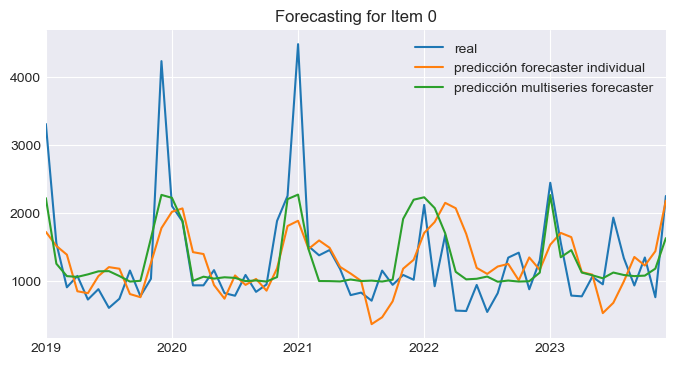

In [ ]:
# Gráfico del item con la máxima mejora
# ======================================================================================
fig, ax=plt.subplots(figsize=(8, 4))
df_imputado['item_0'].tail(60).plot(ax=ax)
predictions['item_0'].tail(60).plot(ax=ax)
predictions_ms['item_0'].tail(60).plot(ax=ax)
ax.legend(['real', 'predicción forecaster individual', 'predicción multiseries forecaster'])
ax.set_xlabel('')
ax.set_title('Forecasting for Item 0');

Según lo observado este es el camino a seguir tenemos las positivos que negativos ! y ademas esto se explicaria que hay productos agricolas que son complementarios y ademas se compportan similar ! 

## Tunning

In [ ]:
# Búsqueda de hiperparámetros y backtesting para un modelo multiserie
# ======================================================================================
lags_grid = [7, 14, 21]
param_grid = {
    'max_iter': [100, 500],
    'max_depth': [3, 5, 10, None],
    'learning_rate': [0.01, 0.1]
}

forecaster_ms = ForecasterAutoregMultiSeries(
                    regressor          = HistGradientBoostingRegressor(random_state=123),
                    lags               = 14,
                    transformer_series = StandardScaler(),
                )

results_grid_ms = grid_search_forecaster_multiseries(
                      forecaster         = forecaster_ms,
                      series             = datos.loc[:fin_validacion, :],
                      levels             = None, # Si es None se seleccionan todos los niveles
                      lags_grid          = lags_grid,
                      param_grid         = param_grid,
                      steps              = 7,
                      metric             = 'mean_absolute_error',
                      initial_train_size = len(datos_train),
                      refit              = False,
                      fixed_train_size   = False,
                      return_best        = True,
                      verbose            = False
                  )      

multi_series_mae, predictions_ms = backtesting_forecaster_multiseries( 
                                       forecaster         = forecaster_ms,
                                       series             = datos,
                                       levels             = None, # Si es None se seleccionan todos los niveles
                                       steps              = 7,
                                       metric             = 'mean_absolute_error',
                                       initial_train_size = len(datos_train) + len(datos_val),
                                       refit              = False,
                                       fixed_train_size   = False,
                                       verbose            = False
                                   )

48 models compared for 676 level(s). Number of iterations: 48.


lags grid:   0%|          | 0/3 [00:00<?, ?it/s]

params grid:   0%|          | 0/16 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
  Parameters: {'learning_rate': 0.01, 'max_depth': None, 'max_iter': 500}
  Backtesting metric: 366.93448283839047
  Levels: ['item_0', 'item_1', 'item_3', 'item_4', 'item_6', 'item_7', 'item_8', 'item_9', 'item_11', 'item_12', 'item_13', 'item_16', 'item_17', 'item_18', 'item_19', 'item_21', 'item_23', 'item_24', 'item_25', 'item_26', 'item_27', 'item_28', 'item_29', 'item_30', 'item_31', 'item_34', 'item_36', 'item_37', 'item_39', 'item_40', 'item_41', 'item_42', 'item_43', 'item_45', 'item_46', 'item_47', 'item_48', 'item_50', 'item_51', 'item_52', 'item_53', 'item_55', 'item_56', 'item_58', 'item_59', 'item_60', 'item_61', 'item_64', 'item_65', 'item_66', 'item_67', 'item_68', 'item_72', 'item_74', 'item_75', 'item_77', 'item_78', 'item_80', 'item_81', 'item_84', 'item_85', 'item_87', 'item_88', 'item_89', 'item_93', 'item

  0%|          | 0/12 [00:00<?, ?it/s]

In [167]:
# ======================================================================================
multi_series_mae = multi_series_mae.set_index('levels')
multi_series_mae.columns = ['multi_series_mae']
results = pd.concat((uni_series_mae, multi_series_mae), axis = 1)
results['improvement'] = results.eval('uni_series_mae - multi_series_mae')
results['improvement_(%)'] = 100 * results.eval('(uni_series_mae - multi_series_mae) / uni_series_mae')
results = results.round(2)
results.style.bar(subset=['improvement_(%)'], align='mid', color=['#d65f5f', '#5fba7d'])

,uni_series_mae,multi_series_mae,improvement,improvement_(%)
item_0,474.230000,370.450000,103.770000,21.880000
item_1,505.400000,492.310000,13.100000,2.590000
item_3,516.450000,540.100000,-23.650000,-4.580000
item_4,446.550000,425.790000,20.770000,4.650000
item_6,470.340000,305.730000,164.610000,35.000000
item_7,357.350000,369.370000,-12.010000,-3.360000
item_8,575.100000,331.590000,243.510000,42.340000
item_9,355.320000,296.520000,58.790000,16.550000
item_11,449.700000,300.930000,148.770000,33.080000
item_12,517.570000,520.600000,-3.030000,-0.590000


In [168]:
# Mejora media de todos los items
# ======================================================================================
results[['improvement', 'improvement_(%)']].agg(['mean', 'min', 'max'])

,improvement,improvement_(%)
mean,89.203151,18.850754
min,-69.040000,-15.560000
max,448.480000,71.300000


In [169]:
# Número de series con mejora positiva y negativa
# ======================================================================================
pd.Series(np.where(results['improvement_(%)'] < 0, 'negative', 'positive')).value_counts()

positive    605
negative     71
dtype: int64

KeyError: 'item_5'

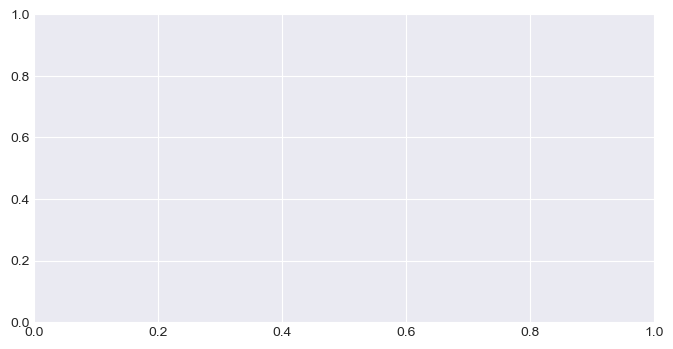

In [267]:
# Gráfico del item con la máxima mejora
# ======================================================================================
fig, ax=plt.subplots(figsize=(8, 4))
df_imputado['item_5'].tail(60).plot(ax=ax)
predictions['item_5'].tail(60).plot(ax=ax)
predictions_ms['item_0'].tail(60).plot(ax=ax)
ax.legend(['real', 'predicción forecaster individual', 'predicción multiseries forecaster'])
ax.set_xlabel('')
ax.set_title('Forecasting for Item 0');

In [ ]:
results_grid_ms

,levels,lags,params,mean_absolute_error,learning_rate,max_depth,max_iter
39,"[item_0, item_1, item_3, item_4, item_6, item_...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.01, 'max_depth': None, 'ma...",366.934483,0.01,NaN,500.0
21,"[item_0, item_1, item_3, item_4, item_6, item_...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.01, 'max_depth': 10, 'max_...",367.213053,0.01,10.0,500.0
23,"[item_0, item_1, item_3, item_4, item_6, item_...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.01, 'max_depth': None, 'ma...",367.251410,0.01,NaN,500.0
33,"[item_0, item_1, item_3, item_4, item_6, item_...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.01, 'max_depth': 3, 'max_i...",367.605776,0.01,3.0,500.0
19,"[item_0, item_1, item_3, item_4, item_6, item_...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.01, 'max_depth': 5, 'max_i...",367.647729,0.01,5.0,500.0
37,"[item_0, item_1, item_3, item_4, item_6, item_...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.01, 'max_depth': 10, 'max_...",368.004885,0.01,10.0,500.0
17,"[item_0, item_1, item_3, item_4, item_6, item_...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.01, 'max_depth': 3, 'max_i...",368.046627,0.01,3.0,500.0
35,"[item_0, item_1, item_3, item_4, item_6, item_...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.01, 'max_depth': 5, 'max_i...",368.216029,0.01,5.0,500.0
31,"[item_0, item_1, item_3, item_4, item_6, item_...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.1, 'max_depth': None, 'max...",368.351868,0.10,NaN,500.0
30,"[item_0, item_1, item_3, item_4, item_6, item_...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'learning_rate': 0.1, 'max_depth': None, 'max...",368.351868,0.10,NaN,100.0


Tenemos un modelo !  

Nos faltaria probar con que rango de tiempo emtrenamos el modelo final , podriamos comprar distintas ventanas de tiempo , ya probamos tomando solo desde el 2018 en adelante 

In [ ]:
print(results_grid_ms.keys())


Index(['levels', 'lags', 'params', 'mean_absolute_error', 'learning_rate',
       'max_depth', 'max_iter'],
      dtype='object')


In [166]:
# Obtener el índice del mejor modelo basado en el menor error absoluto medio
best_model_index = results_grid_ms['mean_absolute_error'].idxmin()

# Obtener los parámetros del mejor modelo
best_params = results_grid_ms.loc[best_model_index, 'params']

# Crear un nuevo ForecasterAutoregMultiSeries con los mejores parámetros
best_forecaster = ForecasterAutoregMultiSeries(
    regressor=HistGradientBoostingRegressor(random_state=123, **best_params),
    lags=14,
    transformer_series=StandardScaler(),
)






save_forecaster(best_forecaster, file_name='forecaster.joblib', verbose=False)


In [23]:
best_forecaster=load_forecaster("forecaster.joblib")

ForecasterAutoregMultiSeries 
Regressor: HistGradientBoostingRegressor(learning_rate=0.01, max_iter=500,
                              random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] 
Transformer for series: StandardScaler() 
Transformer for exog: None 
Window size: 14 
Series levels (names): None 
Series weights: None 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'categorical_features': None, 'early_stopping': 'auto', 'interaction_cst': None, 'l2_regularization': 0.0, 'learning_rate': 0.01, 'loss': 'squared_error', 'max_bins': 255, 'max_depth': None, 'max_iter': 500, 'max_leaf_nodes': 31, 'min_samples_leaf': 20, 'monotonic_cst': None, 'n_iter_no_change': 10, 'quantile': None, 'random_state': 123, 'scoring': 'loss', 'tol': 1e-07, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start

2012

In [29]:
# Separación datos train-val-test
# ==============================================================================
datos = df_imputado.loc['2012-01-01':'2023-12-01'].copy()
fin_train = '2021-12-01'
fin_validacion = '2022-12-01'
datos_train = datos.loc['2012-01-01':fin_train].copy() ##  Ojo Aca se redujo el espacio de entrenamiento ayudando en los resultados finales !
datos_val   = datos.loc[fin_train:fin_validacion, :].copy()
datos_test  = datos.loc[fin_validacion:, :].copy()

print(f"Fechas train      : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas validacion : {datos_val.index.min()} --- {datos_val.index.max()}  (n={len(datos_val)})")
print(f"Fechas test       : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

Fechas train      : 2012-01-01 00:00:00 --- 2021-12-01 00:00:00  (n=120)
Fechas validacion : 2021-12-01 00:00:00 --- 2022-12-01 00:00:00  (n=13)
Fechas test       : 2022-12-01 00:00:00 --- 2023-12-01 00:00:00  (n=13)


In [30]:
# Backtesting forecaster para todos los items
multi_series_mae_12, predictions_ms = backtesting_forecaster_multiseries(
                                       forecaster         = best_forecaster,
                                       series             = datos,
                                       levels             = None, # Si es None se seleccionan todos los niveles
                                       steps              = 12,
                                       metric             = 'mean_absolute_error',
                                       initial_train_size = len(datos)-12*4,
                                       refit              =True,
                                       fixed_train_size   = False,
                                       verbose            = True
                                   )



Information of backtesting process
----------------------------------
Number of observations used for initial training: 96
Number of observations used for backtesting: 48
    Number of folds: 4
    Number of steps per fold: 12
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2012-01-01 00:00:00 -- 2019-12-01 00:00:00  (n=96)
    Validation: 2020-01-01 00:00:00 -- 2020-12-01 00:00:00  (n=12)
Fold: 1
    Training:   2012-01-01 00:00:00 -- 2020-12-01 00:00:00  (n=108)
    Validation: 2021-01-01 00:00:00 -- 2021-12-01 00:00:00  (n=12)
Fold: 2
    Training:   2012-01-01 00:00:00 -- 2021-12-01 00:00:00  (n=120)
    Validation: 2022-01-01 00:00:00 -- 2022-12-01 00:00:00  (n=12)
Fold: 3
    Training:   2012-01-01 00:00:00 -- 2022-12-01 00:00:00  (n=132)
    Validation: 2023-01-01 00:00:00 -- 2023-12-01 00:00:00  (n=12)



  0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
multi_series_mae_12.describe()

,mean_absolute_error
count,676.000000
mean,398.749578
std,123.998465
min,147.474835
25%,303.607632
50%,391.797769
75%,486.297206
max,857.329653


2018

In [24]:
# Separación datos train-val-test
# ==============================================================================
datos = df_imputado.loc['2018-01-01':'2023-12-01'].copy()
fin_train = '2021-12-01'
fin_validacion = '2022-12-01'
datos_train = datos.loc['2012-01-01':fin_train].copy() ##  Ojo Aca se redujo el espacio de entrenamiento ayudando en los resultados finales !
datos_val   = datos.loc[fin_train:fin_validacion, :].copy()
datos_test  = datos.loc[fin_validacion:, :].copy()

print(f"Fechas train      : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas validacion : {datos_val.index.min()} --- {datos_val.index.max()}  (n={len(datos_val)})")
print(f"Fechas test       : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

Fechas train      : 2018-01-01 00:00:00 --- 2021-12-01 00:00:00  (n=48)
Fechas validacion : 2021-12-01 00:00:00 --- 2022-12-01 00:00:00  (n=13)
Fechas test       : 2022-12-01 00:00:00 --- 2023-12-01 00:00:00  (n=13)


In [25]:
# Backtesting forecaster para todos los items
multi_series_mae_18, predictions_ms_18 = backtesting_forecaster_multiseries(
                                       forecaster         = best_forecaster,
                                       series             = datos,
                                       levels             = None, # Si es None se seleccionan todos los niveles
                                       steps              = 12,
                                       metric             = 'mean_absolute_error',
                                       initial_train_size = len(datos)-12*4,
                                       refit              =True,
                                       fixed_train_size   = False,
                                       verbose            = True
                                   )



Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 48
    Number of folds: 4
    Number of steps per fold: 12
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-01-01 00:00:00 -- 2019-12-01 00:00:00  (n=24)
    Validation: 2020-01-01 00:00:00 -- 2020-12-01 00:00:00  (n=12)
Fold: 1
    Training:   2018-01-01 00:00:00 -- 2020-12-01 00:00:00  (n=36)
    Validation: 2021-01-01 00:00:00 -- 2021-12-01 00:00:00  (n=12)
Fold: 2
    Training:   2018-01-01 00:00:00 -- 2021-12-01 00:00:00  (n=48)
    Validation: 2022-01-01 00:00:00 -- 2022-12-01 00:00:00  (n=12)
Fold: 3
    Training:   2018-01-01 00:00:00 -- 2022-12-01 00:00:00  (n=60)
    Validation: 2023-01-01 00:00:00 -- 2023-12-01 00:00:00  (n=12)



  0%|          | 0/4 [00:00<?, ?it/s]

In [34]:
multi_series_mae_18.describe()

,mean_absolute_error
count,676.000000
mean,412.345594
std,118.631426
min,176.614118
25%,324.802261
50%,410.561223
75%,497.786829
max,877.045894


In [56]:
multi_series_mae_18 = multi_series_mae_18.set_index('levels')
multi_series_mae_18.columns = ['multi_series_mae_18']

In [57]:

results = pd.concat((multi_series_mae_18, multi_series_mae_12), axis = 1)
results['improvement'] = results.eval('multi_series_mae_18 - multi_series_mae_12')
results['improvement_(%)'] = 100 * results.eval('(multi_series_mae_18 - multi_series_mae_12) / multi_series_mae_18')
results = results.round(2)
results.style.bar(subset=['improvement_(%)'], align='mid', color=['#d65f5f', '#5fba7d'])

,multi_series_mae_18,multi_series_mae_12,improvement,improvement_(%)
levels,,,,
item_0,374.520000,367.840000,6.680000,1.780000
item_1,543.590000,532.140000,11.450000,2.110000
item_3,526.770000,572.950000,-46.180000,-8.770000
item_4,504.260000,502.180000,2.070000,0.410000
item_6,383.760000,343.680000,40.080000,10.440000
item_7,374.400000,392.850000,-18.450000,-4.930000
item_8,408.640000,409.550000,-0.910000,-0.220000
item_9,239.300000,243.950000,-4.640000,-1.940000
item_11,455.100000,405.160000,49.940000,10.970000


In [61]:
results[['improvement', 'improvement_(%)']].describe()

,improvement,improvement_(%)
count,676.000000,676.000000
mean,13.596065,3.878565
std,22.649108,6.240968
min,-64.160000,-21.380000
25%,-0.325000,-0.085000
50%,13.110000,3.250000
75%,27.242500,7.242500
max,100.140000,26.890000


Por lo que se ve mejor rendimiento utilizando la data desdel el 2018 en adelante !

# Predicciones

In [62]:
# Separación datos train-val-test
# ==============================================================================
datos = df_imputado.loc['2012-01-01':'2023-12-01'].copy()


In [63]:
best_forecaster.fit(datos)

In [64]:
predicciones=best_forecaster.predict(12)

In [65]:
predicciones.to_csv('Predicciones_2024.csv')